In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np

In [5]:
SUBJECT = "C003"
group = "control"
if SUBJECT.startswith("T"):
    group = "test"

montage = mne.channels.make_standard_montage("standard_1020")

In [6]:
# load raw EEG data
raw_eeg_file = (
    f"../ped_neuro_eeg_data/bids/sub-{SUBJECT}/eeg/sub-{SUBJECT}_task-rest_eeg.vhdr"
)
raw = mne.io.read_raw_brainvision(raw_eeg_file, preload=True)
raw.pick(picks="eeg")

raw.set_montage(montage, match_case=False, on_missing="ignore")

Extracting parameters from ../ped_neuro_eeg_data/bids/sub-C003/eeg/sub-C003_task-rest_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 301438  =      0.000 ...  1205.752 secs...


<RawBrainVision | sub-C003_task-rest_eeg.eeg, 27 x 301439 (1205.8 s), ~62.1 MiB, data loaded>

In [ ]:
# load cleaned EEG data
cleaned_eeg_file = (
    f"../ped_neuro_eeg_data/cleaned/{group}/sub-{SUBJECT}_task-rest_cleaned_eeg.fif"
)
cleaned = mne.io.read_raw_fif(cleaned_eeg_file, preload=True)
cleaned.set_montage(montage, match_case=False, on_missing="ignore")

Opening raw data file ../ped_neuro_eeg_data/cleaned/control/sub-C003_task-rest_cleaned_eeg.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 21)  idle
    Range : 75719 ... 225719 =    302.876 ...   902.876 secs
Ready.
Reading 0 ... 150000  =      0.000 ...   600.000 secs...


<Raw | sub-C003_task-rest_cleaned_eeg.fif, 19 x 150001 (600.0 s), ~21.8 MiB, data loaded>

Using matplotlib as 2D backend.


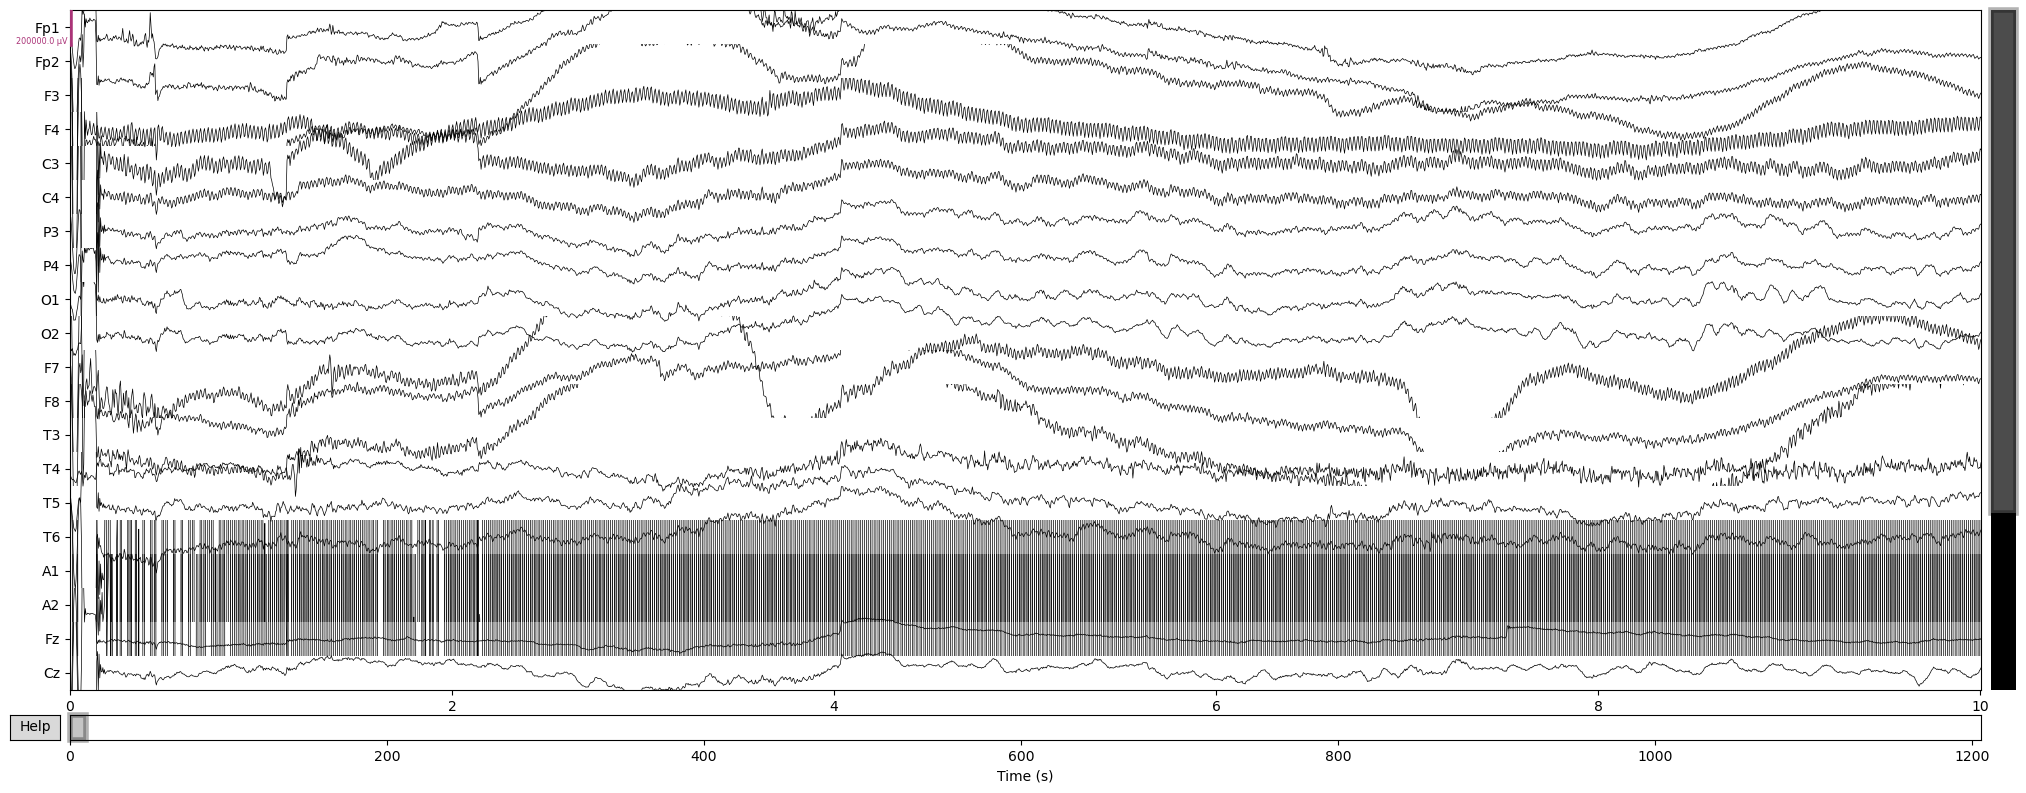

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


c:\Users\demsa\miniconda3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


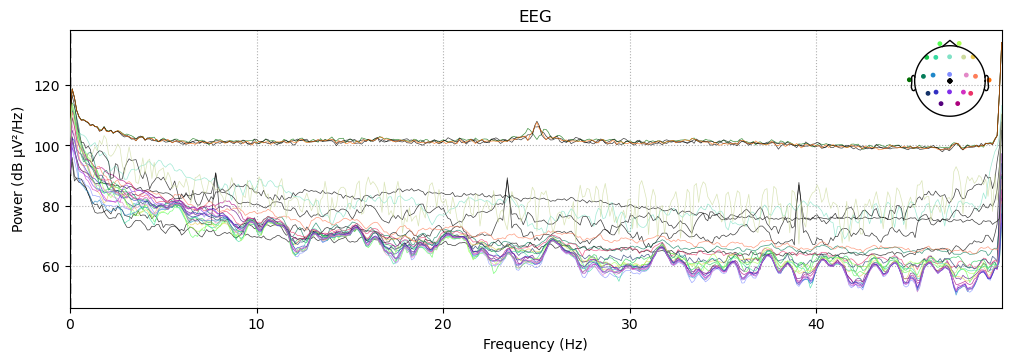

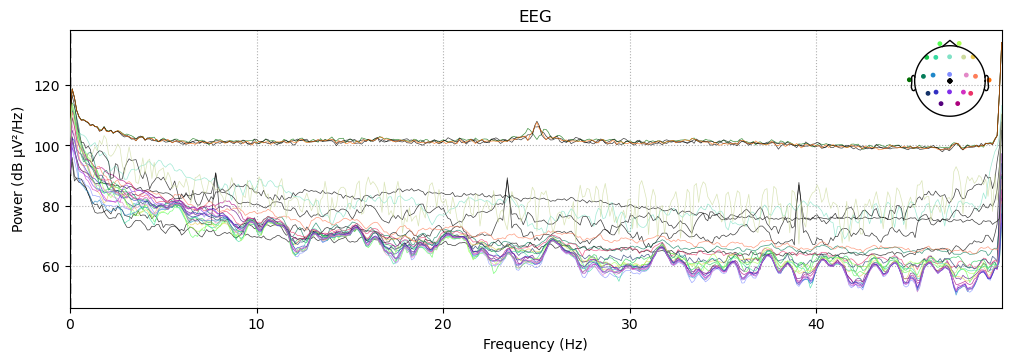

In [9]:
# raw data plots
raw.plot(scalings={"eeg": 10e-2})
raw.compute_psd(fmax=50).plot()

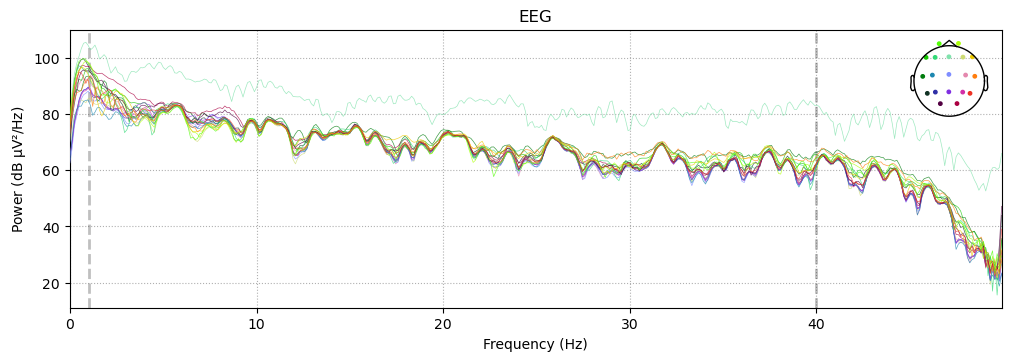

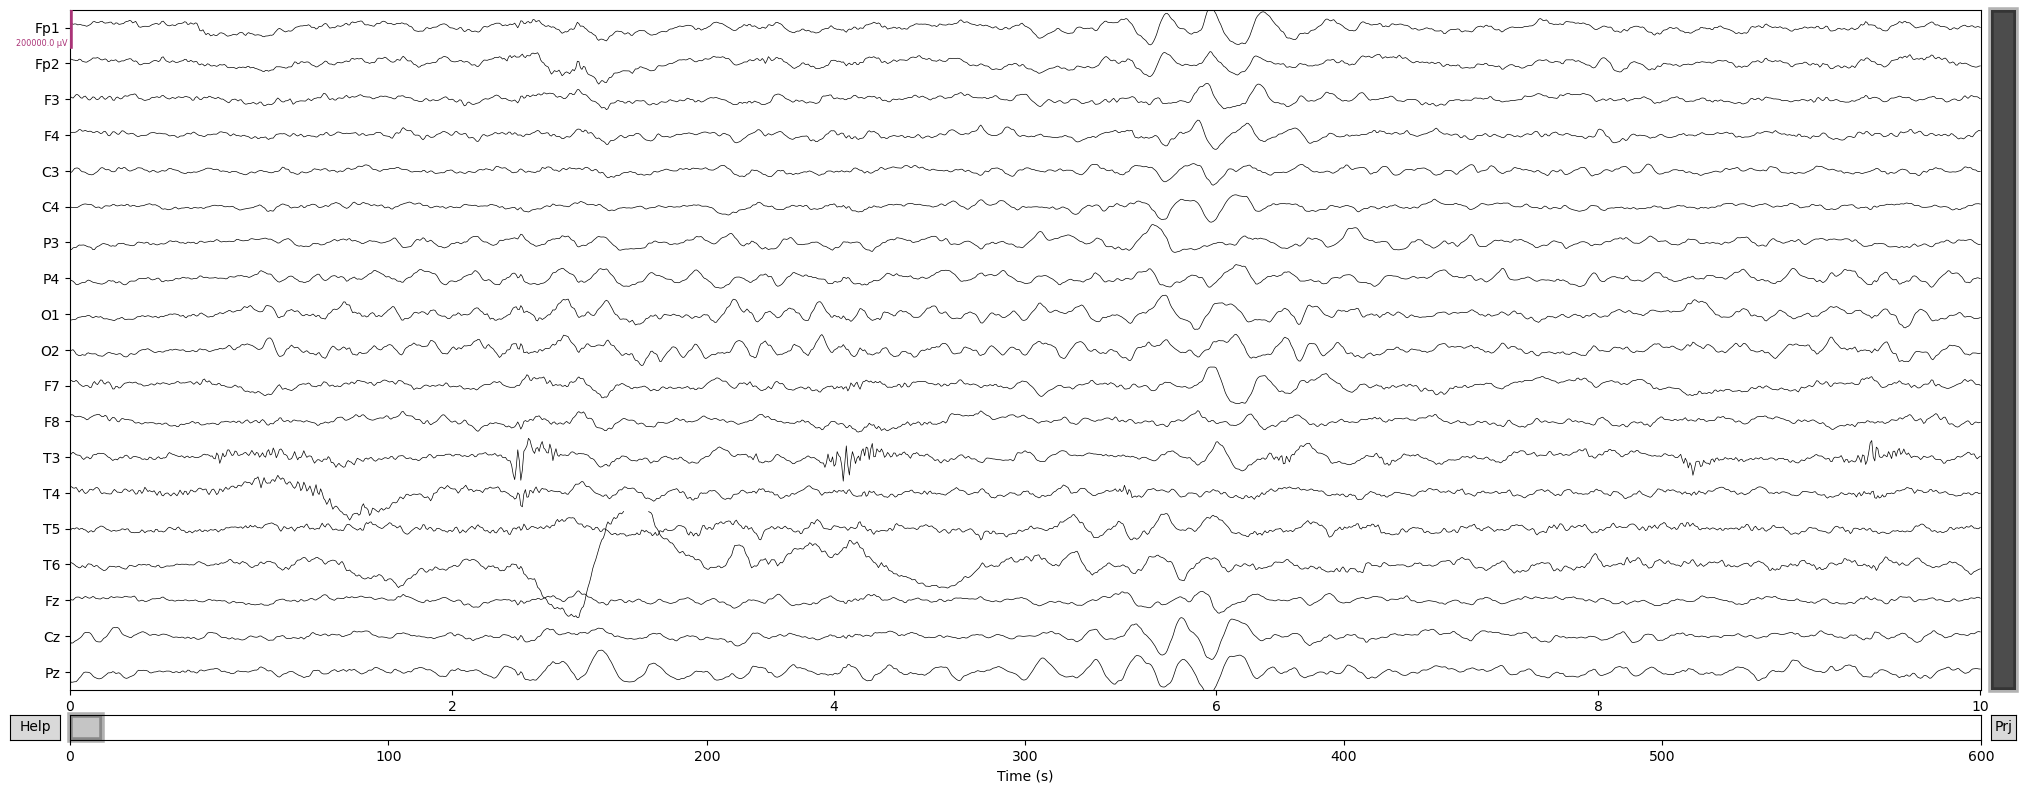

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


c:\Users\demsa\miniconda3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


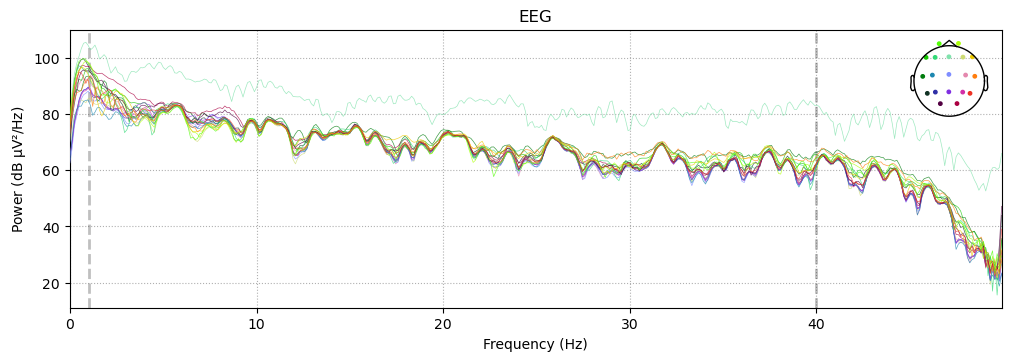

In [11]:
# cleaned data plots
cleaned.plot(scalings={"eeg": 10e-2})
cleaned.compute_psd(fmax=50).plot()